# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API keys
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
weather_df = pd.DataFrame(columns = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])
for city in cities:
    
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    try: 
        weather_response = requests.get(query_url).json()
        city_df = pd.DataFrame({"City": weather_response["name"],
                                "Cloudiness": weather_response["clouds"],
                                "Country": weather_response["sys"]["country"],
                                "Date": weather_response["dt"],
                                "Humidity": weather_response["main"]["humidity"],
                                "Lat": weather_response["coord"]["lat"], 
                                "Lng": weather_response["coord"]["lon"],
                                "Max Temp": weather_response["main"]["temp_max"], 
                                "Wind Speed": weather_response["wind"]["speed"]})
        weather_df = weather_df.append(city_df)

        print(f"Adding city {city}")
    except KeyError:
        print(f"{city} Not Found")

Adding city rikitea
Adding city port alfred
Adding city upernavik
Adding city busselton
Adding city ribeira grande
Adding city nelson bay
Adding city half moon bay
Adding city traverse city
Adding city walvis bay
Adding city jacksonville
illoqqortoormiut Not Found
Adding city saint george
Adding city albany
Adding city zabol
Adding city barrow
Adding city yellowknife
Adding city biltine
Adding city alofi
Adding city turkmenabat
Adding city grand baie
Adding city comodoro rivadavia
Adding city kodiak
Adding city manta
Adding city avarua
Adding city hermanus
samalaeulu Not Found
Adding city baherden
Adding city dakar
Adding city nukus
eskasem Not Found
Adding city jiuquan
Adding city portland
palabuhanratu Not Found
Adding city tuktoyaktuk
Adding city valdivia
Adding city corinto
Adding city east london
Adding city north battleford
Adding city clyde river
Adding city saldanha
taolanaro Not Found
Adding city katangli
Adding city marystown
vaitupu Not Found
Adding city kedougou
Adding city

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df["Max Temp"] = weather_df["Max Temp"] - 273
weather_df.to_csv('weather_df.csv', index = False)
weather_df = pd.read_csv('weather_df.csv')
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,53,PF,1586300121,83,-23.12,-134.97,25.16,6.09
1,Port Alfred,60,ZA,1586299799,76,-33.59,26.89,14.55,5.10
2,Upernavik,74,GL,1586300121,94,72.79,-56.15,-11.16,3.86
3,Busselton,57,AU,1586300025,38,-33.65,115.33,21.82,1.79
4,Ribeira Grande,41,PT,1586300122,88,38.52,-28.70,17.12,8.55


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Max Temperature vs. Latitude')

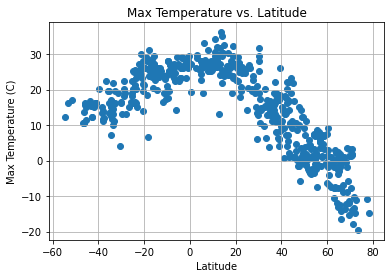

In [5]:
temp_x = weather_df["Lat"]
temp_y = weather_df["Max Temp"]
plt.scatter(temp_x, temp_y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Max Temperature vs. Latitude")

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Humidity vs. Latitude')

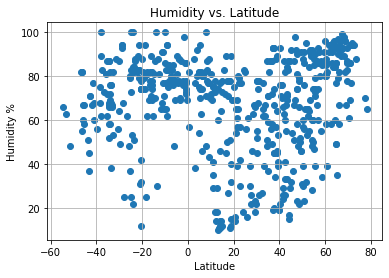

In [6]:
humid_x = weather_df["Lat"]
humid_y = weather_df["Humidity"]
plt.scatter(humid_x, humid_y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Humidity vs. Latitude")

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Cloudiness vs. Latitude')

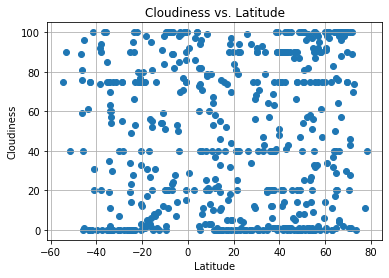

In [7]:
cloud_x = weather_df["Lat"]
cloud_y = weather_df["Cloudiness"]
plt.scatter(cloud_x, cloud_y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude")

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Wind Speed vs. Latitude')

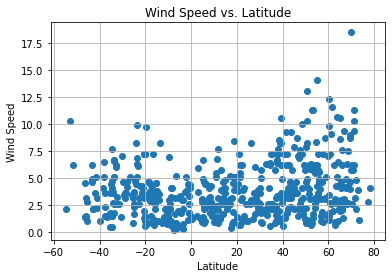

In [8]:
wind_x = weather_df["Lat"]
wind_y = weather_df["Wind Speed"]
plt.scatter(wind_x, wind_y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude")

## Linear Regression

In [9]:
# OPTIONAL: Create a function to create Linear Regression plots


In [10]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_df[weather_df["Lat"] > 0]
south_df = weather_df[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R sqaured = -0.9055613683823323


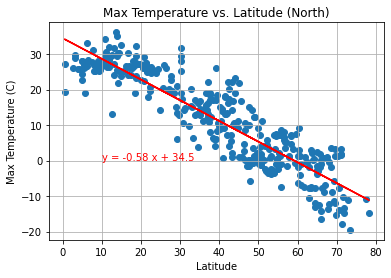

In [19]:
tempnh_x = north_df["Lat"]
tempnh_y = north_df["Max Temp"]
plt.scatter(tempnh_x, tempnh_y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Max Temperature vs. Latitude (North)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(tempnh_x, tempnh_y)

nh_linreg = slope * tempnh_x + intercept
plt.plot(tempnh_x, nh_linreg, color="red")
plt.annotate(f"y = {str(round(slope,2))} x + {str(round(intercept,2))}",(10,0), color = "red")
print(f"R sqaured = {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R sqaured = 0.7352232213025927


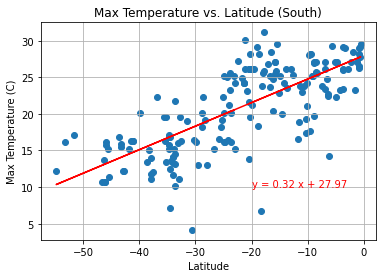

In [12]:
tempsh_x = south_df["Lat"]
tempsh_y = south_df["Max Temp"]
plt.scatter(tempsh_x, tempsh_y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Max Temperature vs. Latitude (South)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(tempsh_x, tempsh_y)

sh_linreg = slope * tempsh_x + intercept
plt.plot(tempsh_x, sh_linreg, color="red")
plt.annotate(f"y = {str(round(slope,2))} x + {str(round(intercept,2))}",(-20,10), color = "red")
print(f"R sqaured = {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R sqaured = 0.30446774876979943


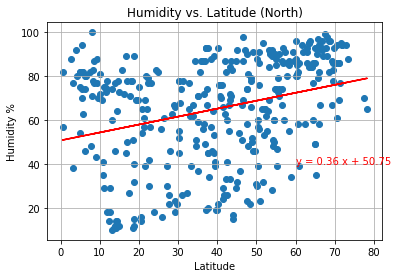

In [13]:
humidnh_x = north_df["Lat"]
humidnh_y = north_df["Humidity"]
plt.scatter(humidnh_x, humidnh_y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Humidity vs. Latitude (North)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(humidnh_x.astype(float), humidnh_y.astype(float))

nh_linreg = slope * humidnh_x + intercept
plt.plot(humidnh_x, nh_linreg, color="red")
plt.annotate(f"y = {str(round(slope,2))} x + {str(round(intercept,2))}",(60,40), color = "red")
print(f"R sqaured = {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R sqaured = 0.25286650414557515


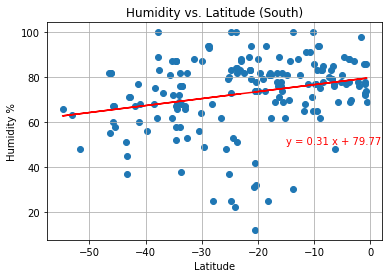

In [14]:
humidsh_x = south_df["Lat"]
humidsh_y = south_df["Humidity"]
plt.scatter(humidsh_x, humidsh_y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Humidity vs. Latitude (South)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(humidsh_x, humidsh_y.astype(float))

sh_linreg = slope * humidsh_x + intercept
plt.plot(humidsh_x, sh_linreg, color="red")
plt.annotate(f"y = {str(round(slope,2))} x + {str(round(intercept,2))}",(-15,50), color = "red")
print(f"R sqaured = {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R sqaured = 0.16232397896351766


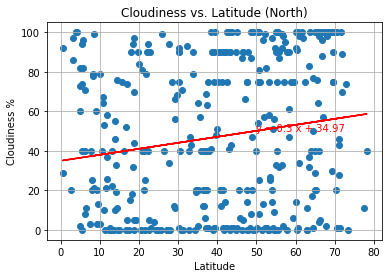

In [15]:
cloudnh_x = north_df["Lat"]
cloudnh_y = north_df["Cloudiness"]
plt.scatter(cloudnh_x, cloudnh_y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("Cloudiness vs. Latitude (North)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(cloudnh_x, cloudnh_y.astype(float))

nh_linreg = slope * cloudnh_x + intercept
plt.plot(cloudnh_x, nh_linreg, color="red")
plt.annotate(f"y = {str(round(slope,2))} x + {str(round(intercept,2))}",(50,50), color = "red")
print(f"R sqaured = {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R sqaured = 0.09491463194680476


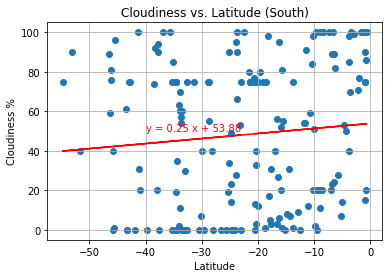

In [16]:
cloudsh_x = south_df["Lat"]
cloudsh_y = south_df["Cloudiness"]
plt.scatter(cloudsh_x, cloudsh_y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("Cloudiness vs. Latitude (South)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(cloudsh_x, cloudsh_y.astype(float))

cloud_sh_linreg = slope * cloudsh_x + intercept
plt.plot(cloudsh_x, cloud_sh_linreg, color="red")
plt.annotate(f"y = {str(round(slope,2))} x + {str(round(intercept,2))}",(-40,50), color = "red")
print(f"R sqaured = {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R sqaured = 0.2928076560798367


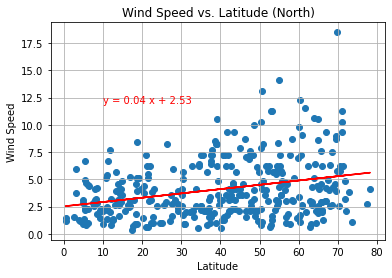

In [17]:
windnh_x = north_df["Lat"]
windnh_y = north_df["Wind Speed"]
plt.scatter(windnh_x, windnh_y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude (North)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(windnh_x, windnh_y)

windnh_linreg = slope * windnh_x + intercept
plt.plot(tempnh_x, windnh_linreg, color="red")
plt.annotate(f"y = {str(round(slope,2))} x + {str(round(intercept,2))}",(10,12), color = "red")
print(f"R sqaured = {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R sqaured = -0.21539246661408867


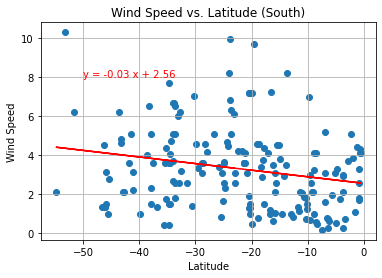

In [18]:
windsh_x = south_df["Lat"]
windsh_y = south_df["Wind Speed"]
plt.scatter(windsh_x, windsh_y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude (South)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(windsh_x, windsh_y)

windsh_linreg = slope * windsh_x + intercept
plt.plot(tempsh_x, windsh_linreg, color="red")
plt.annotate(f"y = {str(round(slope,2))} x + {str(round(intercept,2))}",(-50,8), color = "red")
print(f"R sqaured = {rvalue}")